# House price prediction using regression

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [51]:
df = pd.read_csv("Housing.csv")
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [53]:
df.shape

(545, 13)

In [54]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [55]:
duplicate_rows = df[df.duplicated()]
if duplicate_rows.empty:
    print("No duplicate rows found.")
else:
    print("Duplicate rows found.")

No duplicate rows found.


In [56]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,545.0,4.766729e+06,1.870440e+06,1750000.0,3430000.0,4340000.0,5740000.0,13300000.0
area,545.0,5.150541e+03,2.170141e+03,1650.0,3600.0,4600.0,6360.0,16200.0
bedrooms,545.0,2.965138e+00,7.380639e-01,1.0,2.0,3.0,3.0,6.0
bathrooms,545.0,1.286239e+00,5.024696e-01,1.0,1.0,1.0,2.0,4.0
stories,545.0,1.805505e+00,8.674925e-01,1.0,1.0,2.0,2.0,4.0
parking,545.0,6.935780e-01,8.615858e-01,0.0,0.0,0.0,1.0,3.0


# **Exploratory Data Analysis (EDA)**
1. Visualizing the distribution features
2. Investigating the impact of variables on house prices
3. Examining correlations between features

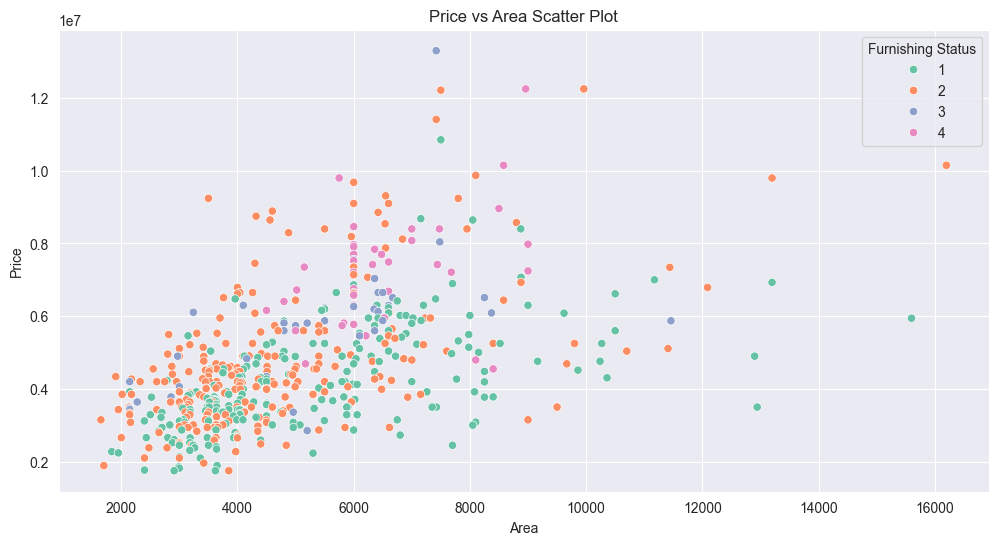

In [57]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='area', y='price', hue='stories', data=df,palette="Set2")
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Price vs Area Scatter Plot')
plt.legend(title='Furnishing Status')
plt.grid(True)
plt.show()

Text(0.5, 1.0, 'Hot water heating')

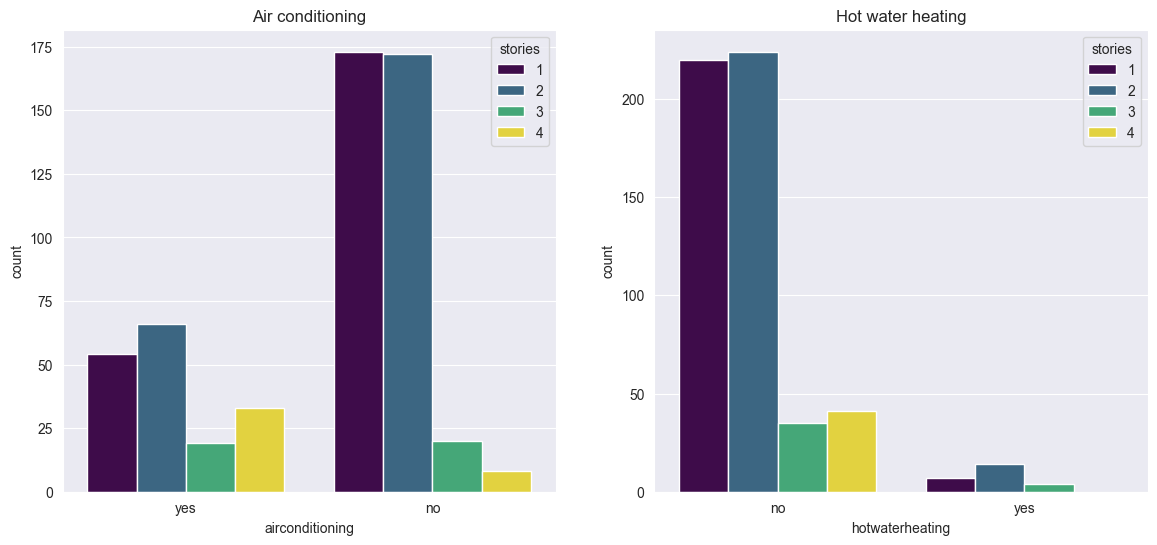

In [58]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the first countplot on the first subplot (axs[0])
sns.countplot(x=df["airconditioning"], hue=df["stories"], palette="viridis", ax=axs[0])

# Plot the second countplot on the second subplot (axs[1])
sns.countplot(x=df["hotwaterheating"], hue=df["stories"], palette="viridis", ax=axs[1])

# Optionally, add titles to the subplots
axs[0].set_title("Air conditioning")
axs[1].set_title("Hot water heating")

C:\Users\40756\AppData\Local\Temp\ipykernel_7868\3833044603.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=df["stories"].index,x=df["basement"],palette="viridis")


<Axes: xlabel='basement', ylabel='None'>

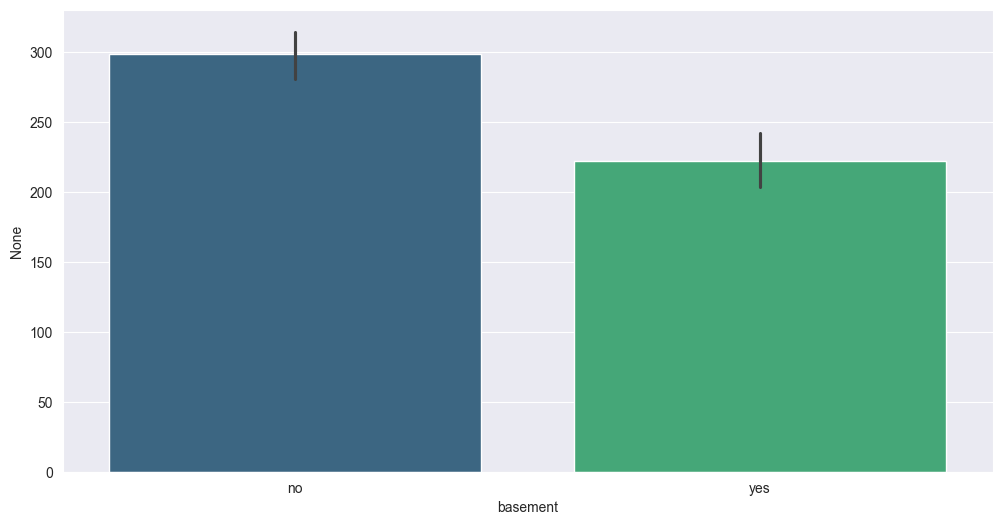

In [59]:
plt.figure(figsize=(12, 6))

sns.barplot(y=df["stories"].index,x=df["basement"],palette="viridis")

C:\Users\40756\AppData\Local\Temp\ipykernel_7868\2132784905.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[columns[counter]], ax=axs[i, j], palette="viridis")
C:\Users\40756\AppData\Local\Temp\ipykernel_7868\2132784905.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[columns[counter]], ax=axs[i, j], palette="viridis")
C:\Users\40756\AppData\Local\Temp\ipykernel_7868\2132784905.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(df[columns[counter]], ax=axs[i, j], palette="viridis")
C:\Users\40756\AppData\Local\Temp\ipykernel

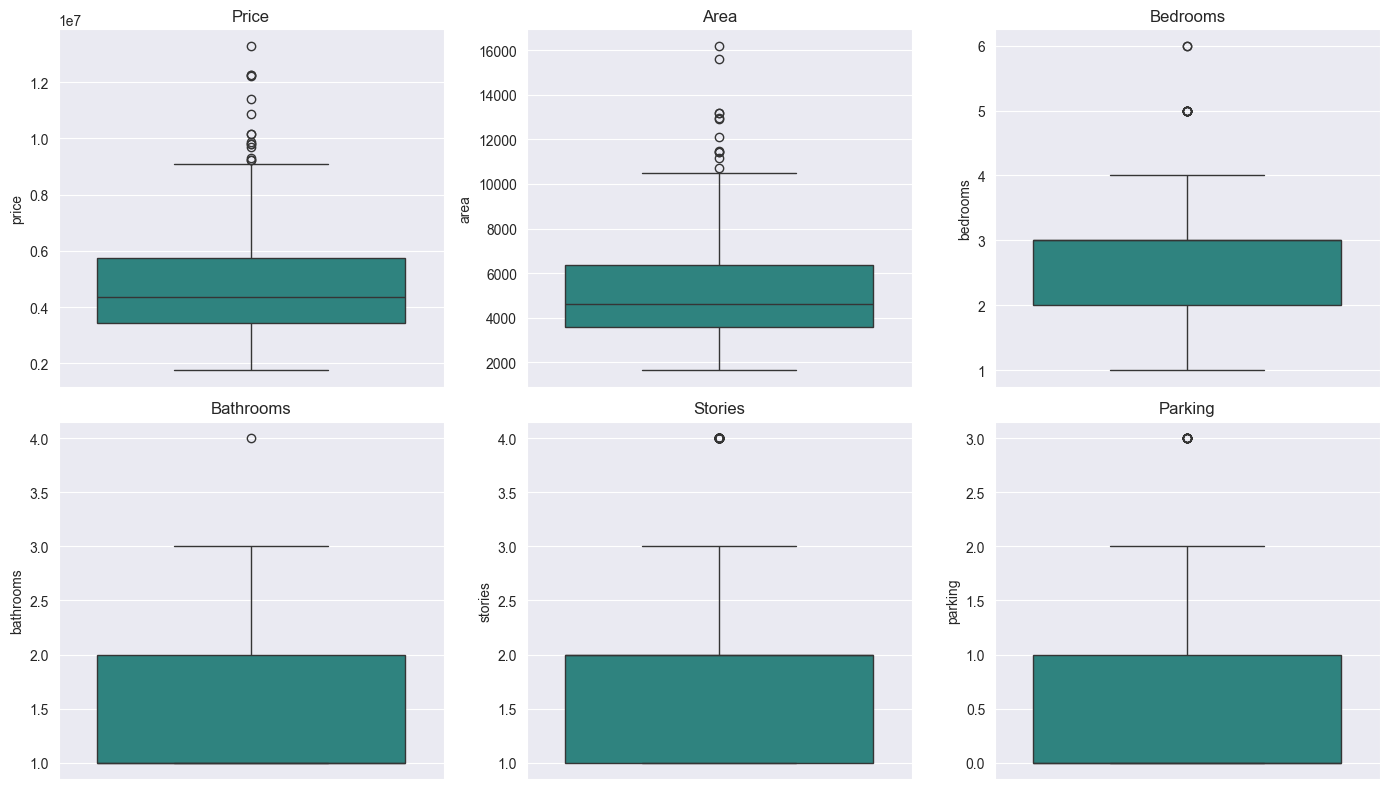

In [60]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(14, 8))

# List of column names you want to plot
columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']

counter = 0

for i in range(2):
    for j in range(3):
        sns.boxplot(df[columns[counter]], ax=axs[i, j], palette="viridis")
        axs[i, j].set_title(columns[counter].capitalize())
        counter += 1

plt.tight_layout()
plt.show()

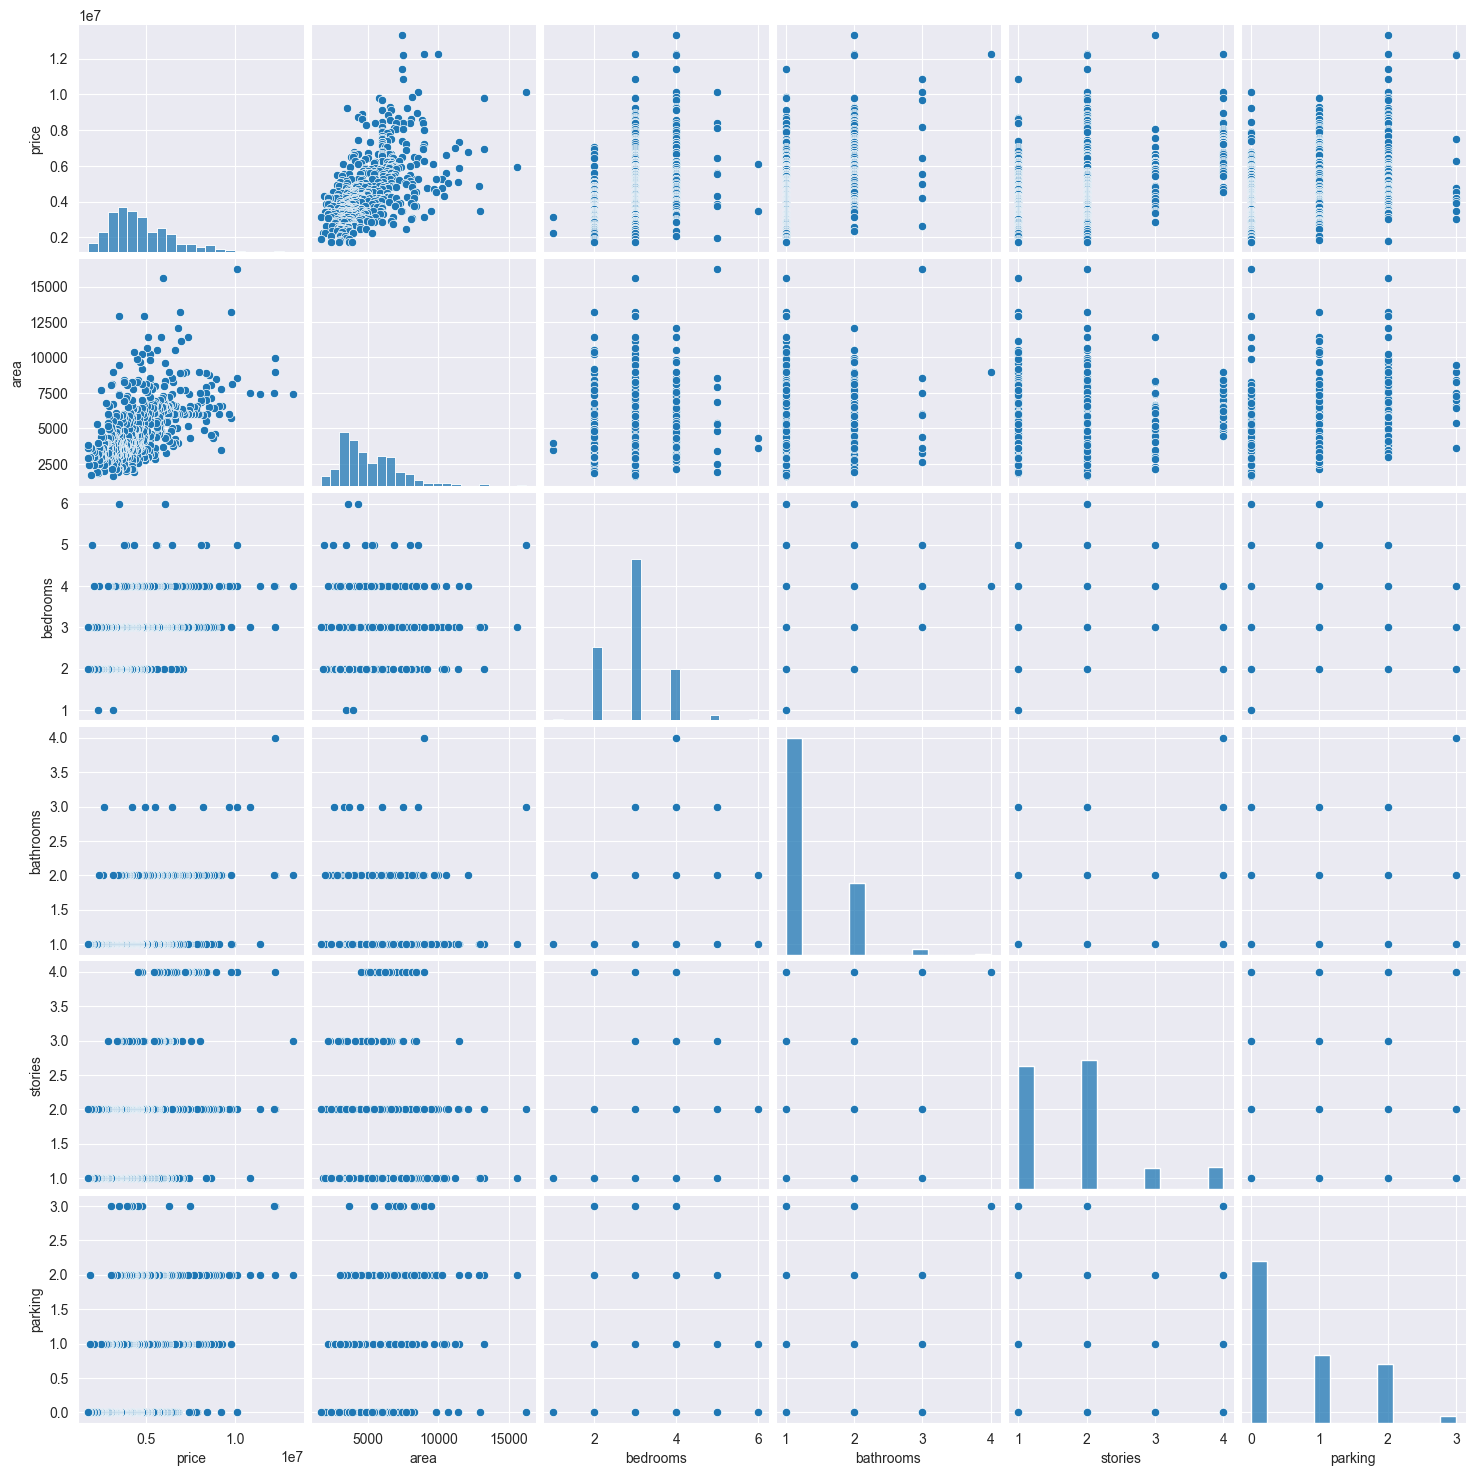

In [61]:
sns.pairplot(df)
plt.show()

# **Preprocessing**


# **Convert object columns to int**

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [68]:
# Identify the categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    # If there are only two unique values, replace them with 0 and 1
    if df[col].nunique() == 2:
        df[col] = df[col].replace({'yes': 1, 'no': 0}).astype(int)
    # If there are more than two unique values, use LabelEncoder
    else:
        df[col] = LabelEncoder().fit_transform(df[col])
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [69]:
# checking
df['furnishingstatus'].value_counts()

furnishingstatus
1    227
2    178
0    140
Name: count, dtype: int64

In [70]:

df.dtypes

price               int64
area                int64
bedrooms            int64
bathrooms           int64
stories             int64
mainroad            int32
guestroom           int32
basement            int32
hotwaterheating     int32
airconditioning     int32
parking             int64
prefarea            int32
furnishingstatus    int32
dtype: object

# **Handling Missing Values**

In [76]:

from scipy import stats

class DataCleaning:

    @staticmethod
    def handle_missing_values(df, method='mean'):
        if method == 'mean':
            return df.fillna(df.mean())
        elif method == 'median':
            return df.fillna(df.median())
        elif method == 'mode':
            return df.fillna(df.mode().iloc[0])
        else:
            raise ValueError("Method must be either 'mean', 'median' or 'mode'")

    @staticmethod
    def handle_duplicates(df):
        return df.drop_duplicates()

    @staticmethod
    def handle_outliers(df, z_score_threshold=3):
        numeric_cols = df.select_dtypes(include=[np.number])
        z_scores = np.abs(stats.zscore(numeric_cols))
        df = df[(z_scores < z_score_threshold).all(axis=1)]
        return df


In [77]:
cleaner = DataCleaning()
data = cleaner.handle_missing_values(df, method='median')
data = cleaner.handle_duplicates(df)
data = cleaner.handle_outliers(df, z_score_threshold=3)

In [78]:
data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

 # **Extracting the most imporant features**

price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
furnishingstatus   -0.304721
Name: price, dtype: float64


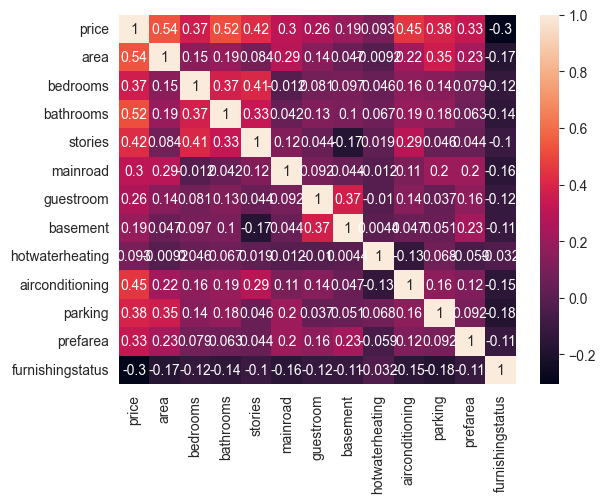

In [81]:
# correlation matrix
corr_matrix = df.corr()
# print(corr_matrix)
# Visualize the correlation matrix
sns.heatmap(corr_matrix, annot=True)
important_features = corr_matrix['price'].sort_values(ascending=False)

# Print the most important features in relation to the price
print(important_features)

# **Model Building**
1. **Linear Regression**
2. **Random Forest Regressor**
3. **Support Vector Machines (SVM) Regressor**
4. **Gradient Boosting Regressor**

In [97]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVC

In [98]:
models = {
    'Linear Regression': LinearRegression(n_jobs=5),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting':GradientBoostingRegressor(),
}

# **Model**

### Steps:

1. **Splitting the Data:**
   - Divide the dataset into training and validation sets.

2. **Training Models:**
   - Train each model using the training data.

3. **Performance Evaluation:**
   - Evaluate model performance using metrics such as:
     - R2 Score
     - Mean absolute eroor
     - Mean squared error

4. **Comparison:**
   - Compare the models based on their performance metrics.
   - Choose the best-performing model for further analysis or deployment.


In [104]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [105]:
# List of features to train the model on
# features = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
features = ['hotwaterheating', 'airconditioning',  'furnishingstatus']
# Select the features from the DataFrame
X = df[features]
y = df['price']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)



In [106]:
a=1
best_r2=-1

for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])

    # Fit the pipeline
    model=pipe.fit(X_train, y_train)
    y_pre=model.predict(X_test)

    print(f'{a} :- {name} - MSE: {mean_squared_error(y_test, y_pre):.4f}')
    print(f'     {name} - R2: {r2_score(y_test, y_pre):.4f}')
    print(f'     {name} - MAE: {mean_absolute_error(y_test, y_pre):.4f}',"\n")
    a+=1
    r2=r2_score(y_test, y_pre)
    if r2 > best_r2:
        best_r2 = r2
        best_model_name = name
        best_model = model

1 :- Linear Regression - MSE: 3828897097978.9878
     Linear Regression - R2: 0.2425
     Linear Regression - MAE: 1436142.2859 

2 :- Random Forest - MSE: 3748719180763.4673
     Random Forest - R2: 0.2584
     Random Forest - MAE: 1408724.3858 

3 :- Gradient Boosting - MSE: 3753853853880.8848
     Gradient Boosting - R2: 0.2573
     Gradient Boosting - MAE: 1410614.1437 



In [107]:
print(f'The best model is: {best_model_name}')
print(f'The best model R2 Score is: {best_r2}')

The best model is: Random Forest
The best model R2 Score is: 0.258350562352305


In [113]:

data_to_predict = []
for feature in features:
    # numerical features
    if df[feature].dtype in ['int64', 'float64']:
        min_val = df[feature].min()
        max_val = df[feature].max()
        value = float(input(f"Enter the value for {feature} (Min: {min_val}, Max: {max_val}): "))
        if not min_val <= value <= max_val:
            raise ValueError(f"Invalid value for {feature}. It should be between {min_val} and {max_val}.")
    else:
        unique_values = df[feature].unique()
        value = input(f"Enter the value for {feature}, (Values: {unique_values}): ")
    data_to_predict.append(value)

# Convert the list to a nested list
data_to_predict = [data_to_predict]

# Make a prediction
prediction = best_model.predict(data_to_predict)
feature_values = dict(zip(features, data_to_predict[0]))

print("Features and their values:", feature_values)
print("Predicted Price:", prediction)

Features and their values: {'hotwaterheating': '0', 'airconditioning': '1', 'furnishingstatus': '1'}
Predicted Price: [5758306.98568742]


D:\Python\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
